In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [4]:
import data

In [5]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.


In [6]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 35 dupe results.


In [7]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [8]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"] == 1

In [9]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [10]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [11]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,survey_question_idx,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,11532.0,0.0-3.0,2021-08-23 19:33:33.192,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,solid,full,False,False,NaN
4,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,6128.0,0.0-4.0,2021-08-23 19:33:39.325,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,liquid,full,False,False,NaN
5,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,7564.0,0.0-5.0,2021-08-23 19:33:46.893,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,abstract,empty,False,False,NaN
6,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,9300.0,0.0-6.0,2021-08-23 19:33:56.197,04_comprehension_swarm-full,...,<NA>,NaN,87.0,False,practice,solid,empty,False,False,0.751921
7,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,4540.0,0.0-7.0,2021-08-23 19:34:00.742,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,abstract,full,False,False,NaN


In [12]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [13]:
N = len(response_df.reset_index().uniqueid.unique())
N

90

### Demo

In [14]:
# again hack -- forgot to put in experiment_id
qualitative_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

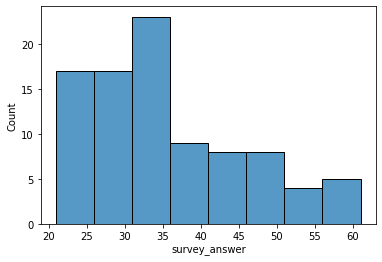

In [15]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [16]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    54
Master's degree      26
Some college         10
High school/GED       1
Name: survey_answer, dtype: int64

In [17]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    90
No      1
Name: survey_answer, dtype: int64

### Comments

In [18]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['nice',
 'None',
 '',
 'GOOD',
 '',
 '',
 '',
 '',
 '',
 'very goods',
 'very interesting',
 'nice',
 'No',
 'good job',
 'No.',
 'very well',
 '',
 '',
 'NICE',
 'Good and easy task',
 'It was a good survey.',
 'good',
 'This was a fascinating and enjoyable study.',
 'This survey is good and usefull me',
 '',
 'very like the survey',
 'none',
 'GOOD',
 'Interested',
 'This survey is very nice and very good ',
 'Good task and good study.',
 '',
 'very interesting',
 'none',
 'nothing',
 '',
 'cool hit!',
 'nothing',
 'good',
 'nice.',
 'LIKE IT',
 'good study',
 'very nice study',
 'none',
 'none',
 '',
 'none',
 '',
 'na',
 'good',
 'LIKE IT',
 '',
 'very interesting',
 'Good experiment',
 '',
 '',
 'It was good',
 '',
 '',
 'Enjoyed the survey.',
 '',
 '',
 '',
 'noe',
 '',
 'nice survey',
 'none',
 'None',
 'None',
 '',
 "I'm brimming with gratitude.  ",
 '',
 'No',
 '',
 'good',
 '',
 'none',
 '',
 'good',
 'interesting study.',
 'good survey',
 '',
 '',
 '',
 'nice',
 'Almost Per

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

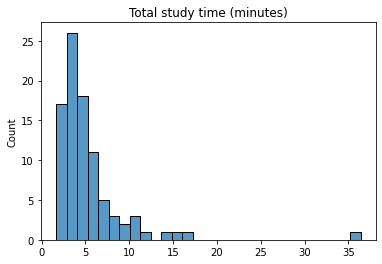

In [19]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [20]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.408301
std     4.413421
Name: rt, dtype: float64

### Response times

In [21]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

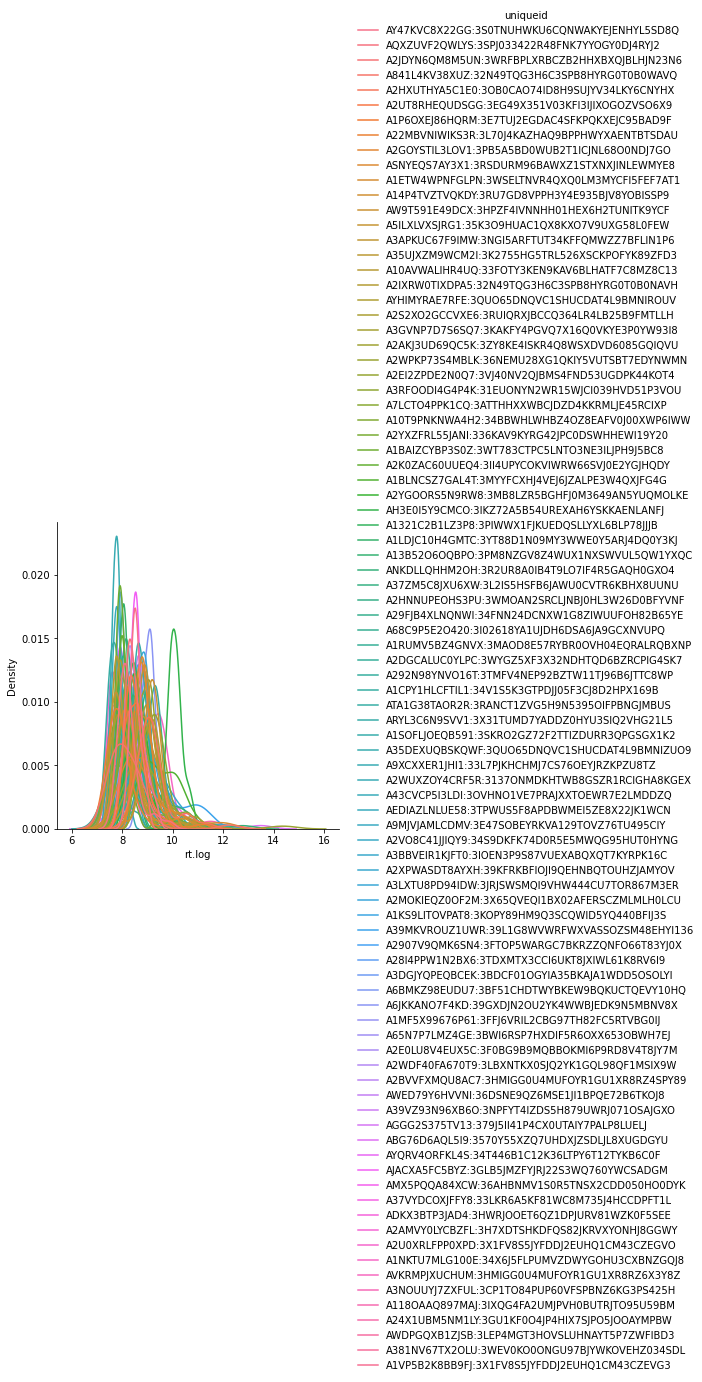

In [22]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

Text(0.5, 1.0, 'Log response time vs. trial position')

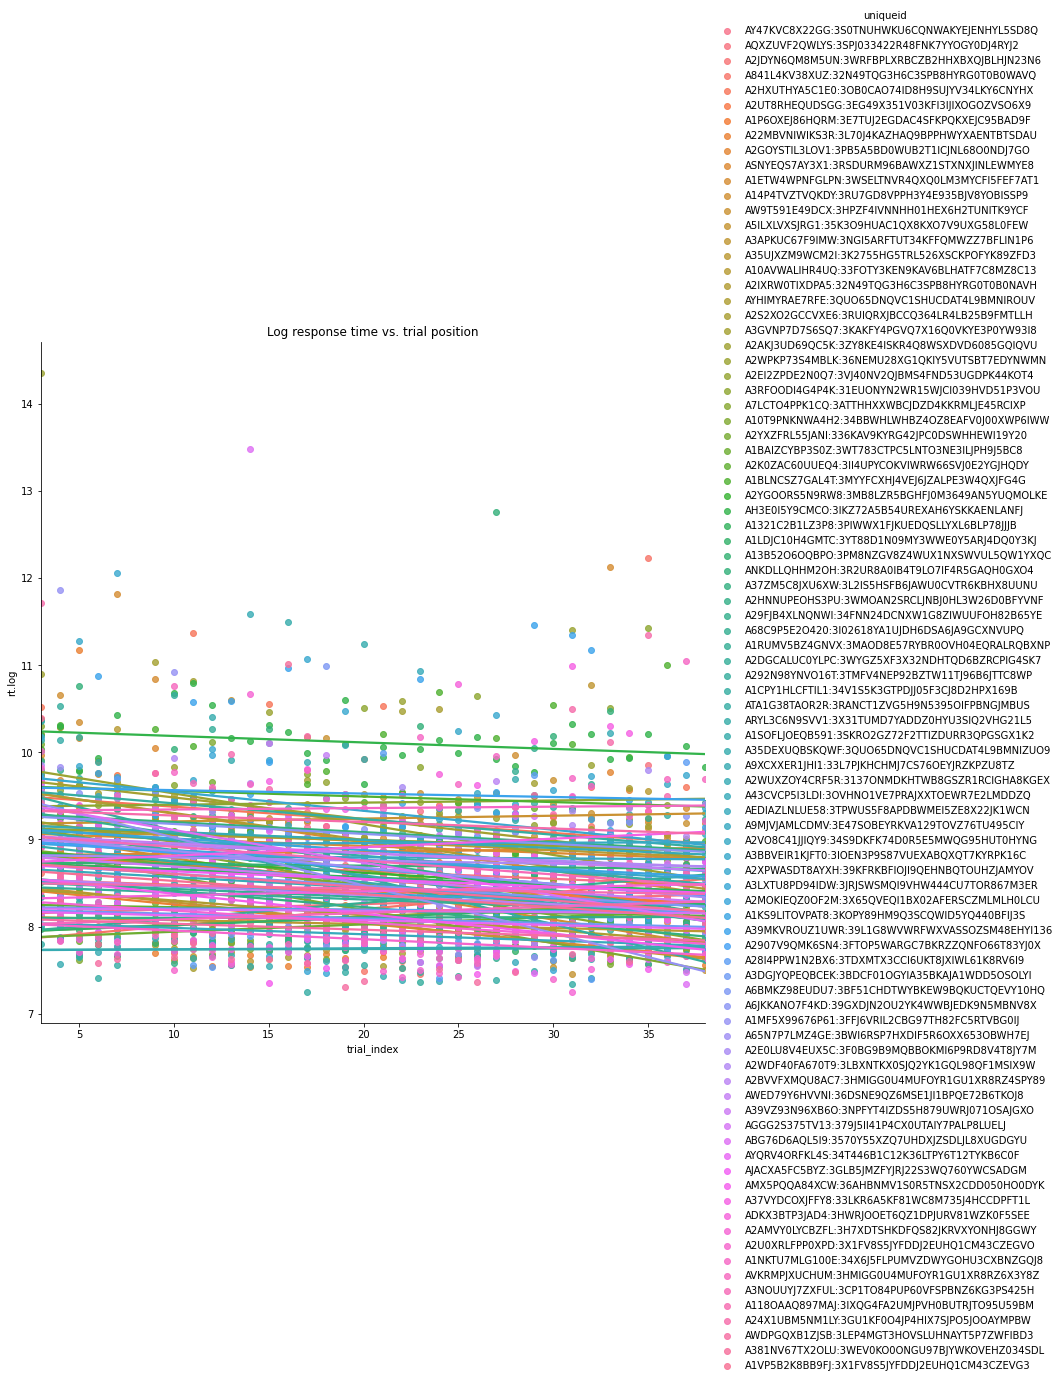

In [23]:
sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

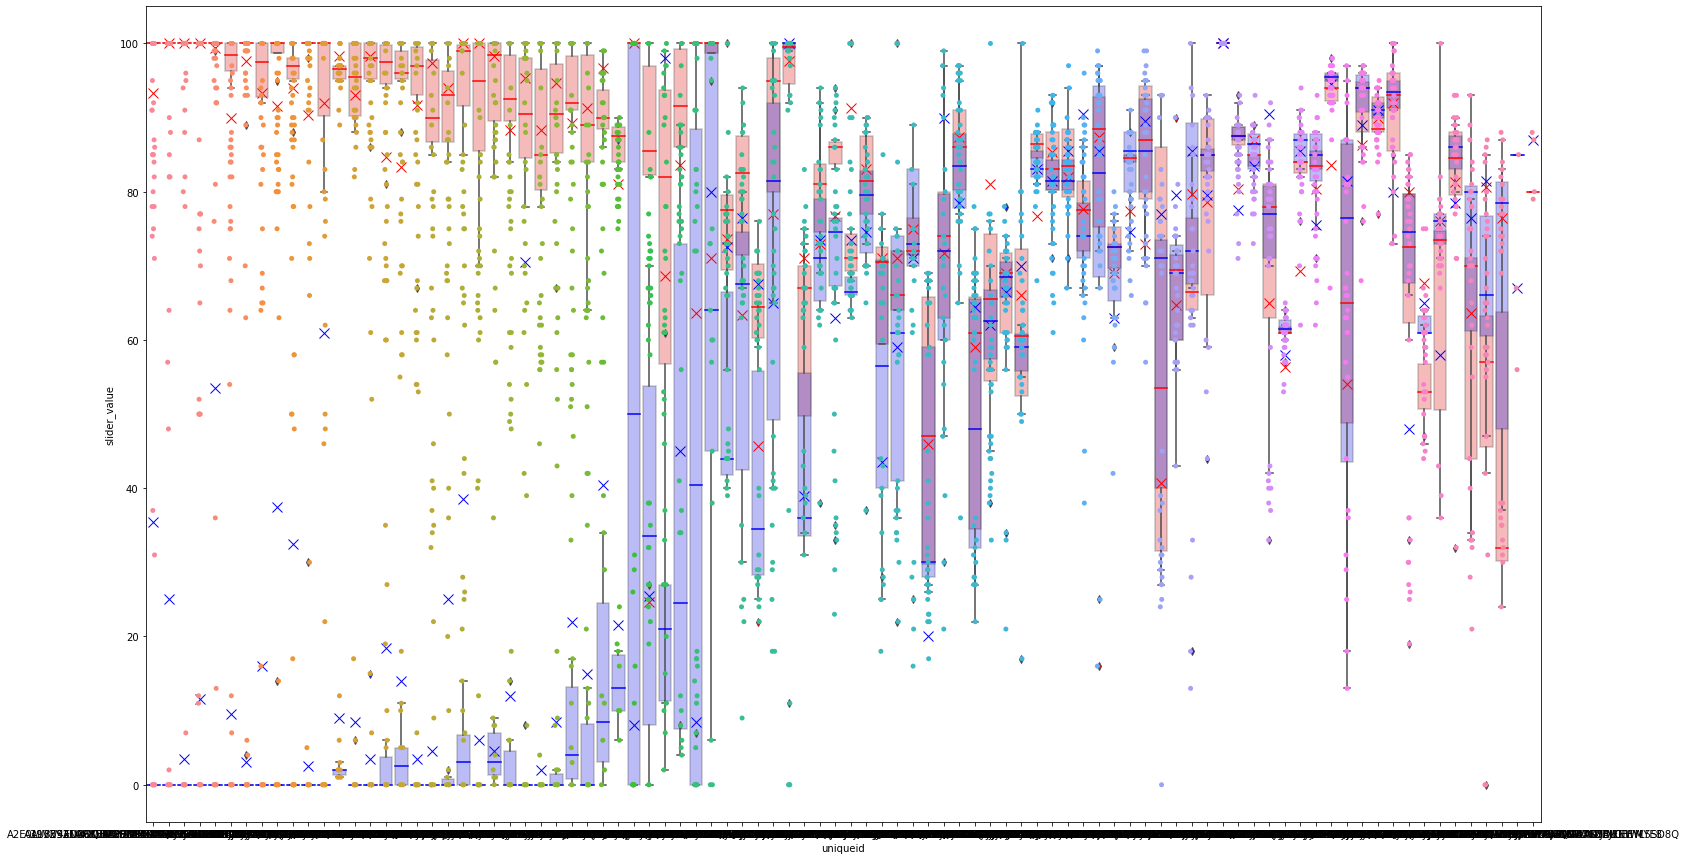

In [24]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(25, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [25]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

<ipython-input-25-380d923c644c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
<ipython-input-25-380d923c644c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [72]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = {"solidempty", "abstractempty"}

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [73]:
practice_df.groupby("practice_id").match.mean()

practice_id
abstractfull    0.811111
liquidfull      0.900000
solidfull       0.933333
Name: match, dtype: float64

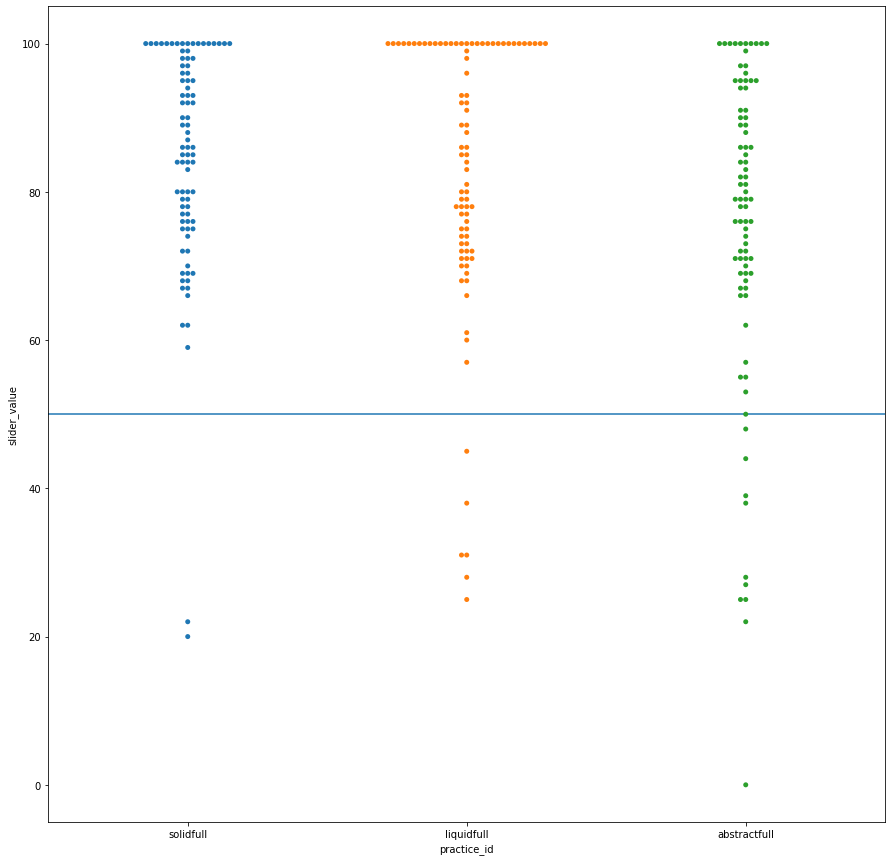

In [74]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [75]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
abstractfull,0.066667,90
solidfull,0.044444,90
liquidfull,0.033333,90


### Fillers

<AxesSubplot:xlabel='t'>

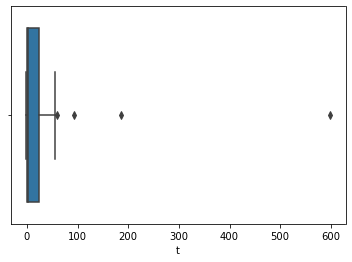

In [76]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [77]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
A2MOKIEQZ0OF2M:3X65QVEQI1BX02AFERSCZMLMLH0LCU,-2.015044,0.071570
A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW,-1.720933,0.115998
A1VP5B2K8BB9FJ:3X1FV8S5JYFDDJ2EUHQ1CM43CZEVG3,-1.482655,0.168980
A5ILXLVXSJRG1:35K3O9HUAC1QX8KXO7V9UXG58L0FEW,-1.381426,0.197231
ADKX3BTP3JAD4:3HWRJOOET6QZ1DPJURV81WZK0F5SEE,-1.143001,0.279664
A37ZM5C8JXU6XW:3L2IS5HSFB6JAWU0CVTR6KBHX8UUNU,-1.005735,0.338258
A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU,-0.876703,0.403441
A28I4PPW1N2BX6:3TDXMTX3CCI6UKT8JXIWL61K8RV6I9,-0.752071,0.469340
A2K0ZAC60UUEQ4:3II4UPYCOKVIWRW66SVJ0E2YGJHQDY,-0.745421,0.475034


#### Filler copouts

In [78]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
3.0,empty,0.055556,5,90
1.0,empty,0.044444,4,90
5.0,empty,0.044444,4,90
6.0,full,0.044444,4,90
7.0,full,0.044444,4,90
8.0,full,0.044444,4,90
10.0,full,0.044444,4,90
11.0,full,0.044444,4,90
0.0,empty,0.033333,3,90


#### Filler failures by item

In [79]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

<ipython-input-79-5f9f2f07b75b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [80]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.500000
             1.0        0.455556
             2.0        0.466667
             3.0        0.455556
             4.0        0.444444
             5.0        0.477778
full         6.0        0.888889
             7.0        0.866667
             8.0        0.888889
             9.0        0.900000
             10.0       0.866667
             11.0       0.877778
Name: match, dtype: float64

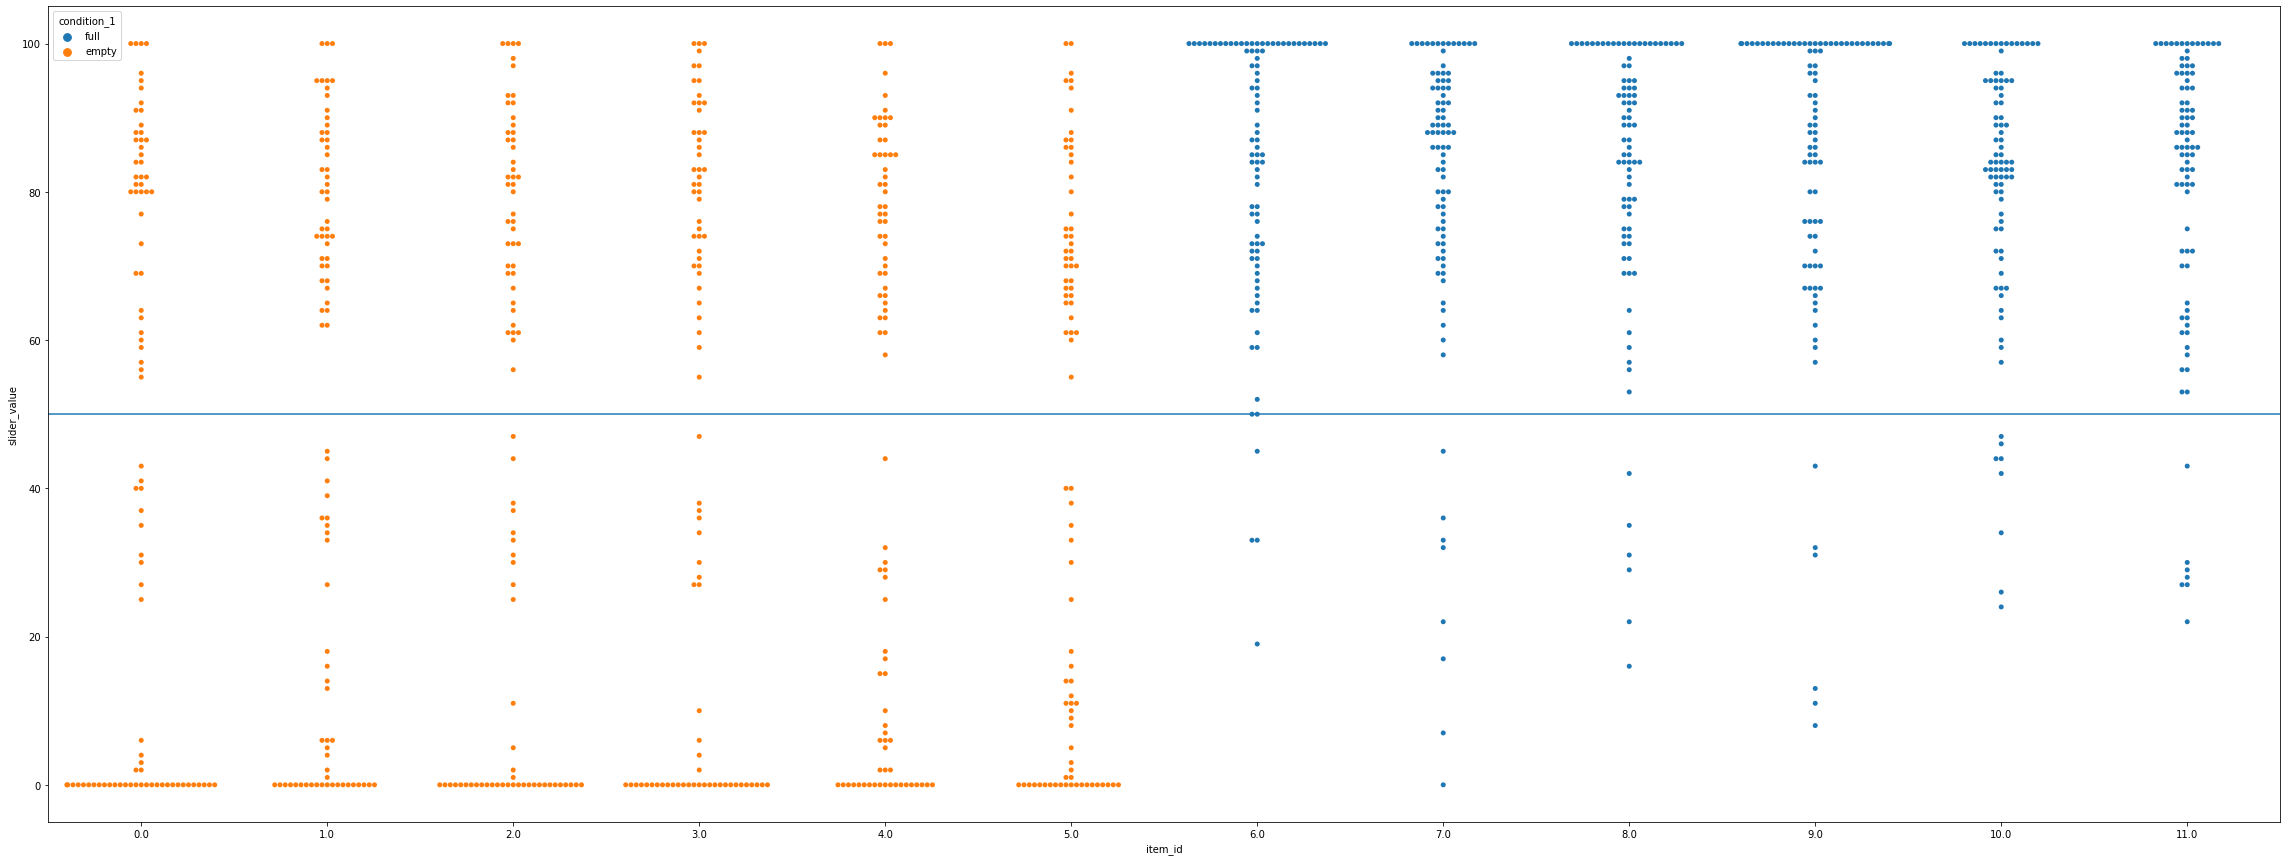

In [81]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [120]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [121]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

7 subjects (7.8%) disqualified and dropped due to failed practice.
	AYQRV4ORFKL4S:34T446B1C12K36LTPY6T12TYKB6C0F
	ABG76D6AQL5I9:3570Y55XZQ7UHDXJZSDLJL8XUGDGYU
	A29FJB4XLNQNWI:34FNN24DCNXW1G8ZIWUUFOH82B65YE
	AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q
	ASNYEQS7AY3X1:3RSDURM96BAWXZ1STXNXJINLEWMYE8
	AMX5PQQA84XCW:36AHBNMV1S0R5TNSX2CDD050HO0DYK
	A2HNNUPEOHS3PU:3WMOAN2SRCLJNBJ0HL3W26D0BFYVNF
53 subjects (58.9%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW
	A118OAAQ897MAJ:3IXQG4FA2UMJPVH0BUTRJTO95U59BM
	A1321C2B1LZ3P8:3PIWWX1FJKUEDQSLLYXL6BLP78JJJB
	A14P4TVZTVQKDY:3RU7GD8VPPH3Y4E935BJV8YOBISSP9
	A1BAIZCYBP3S0Z:3WT783CTPC5LNTO3NE3ILJPH9J5BC8
	A1ETW4WPNFGLPN:3WSELTNVR4QXQ0LM3MYCFI5FEF7AT1
	A1LDJC10H4GMTC:3YT88D1N09MY3WWE0Y5ARJ4DQ0Y3KJ
	A1MF5X99676P61:3FFJ6VRIL2CBG97TH82FC5RTVBG0IJ
	A1RUMV5BZ4GNVX:3MAOD8E57RYBR0OVH04EQRALRQBXNP
	A1VP5B2K8BB9FJ:3X1FV8S5JYFDDJ2EUHQ1CM43CZEVG3
	A22MBVNIWIKS3R:3L70J4KAZH

In [84]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

32 subjects remaining.


### Merge in materials

In [85]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [86]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [87]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-004-given.


### Export

In [88]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [89]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

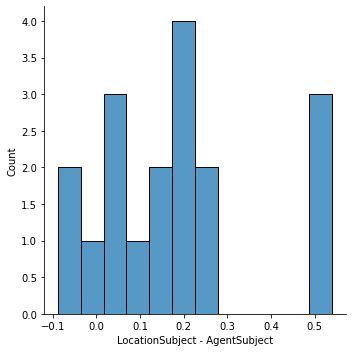

In [90]:
sns.displot(item_differences, bins=12)

In [91]:
item_differences.sort_values(ascending=False)

item_id  A             V        L           A concrete?  A countable?
56.0     tadpoles      swimm    pond        True         True            0.539375
64.0     worms         wriggl   bucket      True         True            0.521060
24.0     frogs         hopp     swamp       True         True            0.499859
18.0     birds         flutter  courtyard   True         True            0.236782
19.0     bubbles       foam     tub         True         True            0.233614
30.0     fear          prickl   fingertips  False        False           0.210621
17.0     debris        flow     river       True         False           0.194470
39.0     sewage        runn     street      True         False           0.190113
8.0      cockroaches   creep    cave        True         True            0.173455
6.0      terror        cours    body        False        False           0.159565
20.0     fireflies     glimmer  backyard    True         True            0.155649
7.0      excitement    crack

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'cockroaches creep'),
  Text(1, 0, 'sewage runn'),
  Text(2, 0, 'frogs hopp'),
  Text(3, 0, 'fireflies glimmer'),
  Text(4, 0, 'birds flutter'),
  Text(5, 0, 'worms wriggl'),
  Text(6, 0, 'lights glow'),
  Text(7, 0, 'terror cours'),
  Text(8, 0, 'bubbles foam'),
  Text(9, 0, 'excitement puls'),
  Text(10, 0, 'tadpoles swimm'),
  Text(11, 0, 'debris flow'),
  Text(12, 0, 'excitement crackl'),
  Text(13, 0, 'trepidation shak'),
  Text(14, 0, 'people bustl'),
  Text(15, 0, 'fear prickl'),
  Text(16, 0, 'anticipation tingl'),
  Text(17, 0, 'energy humm')])

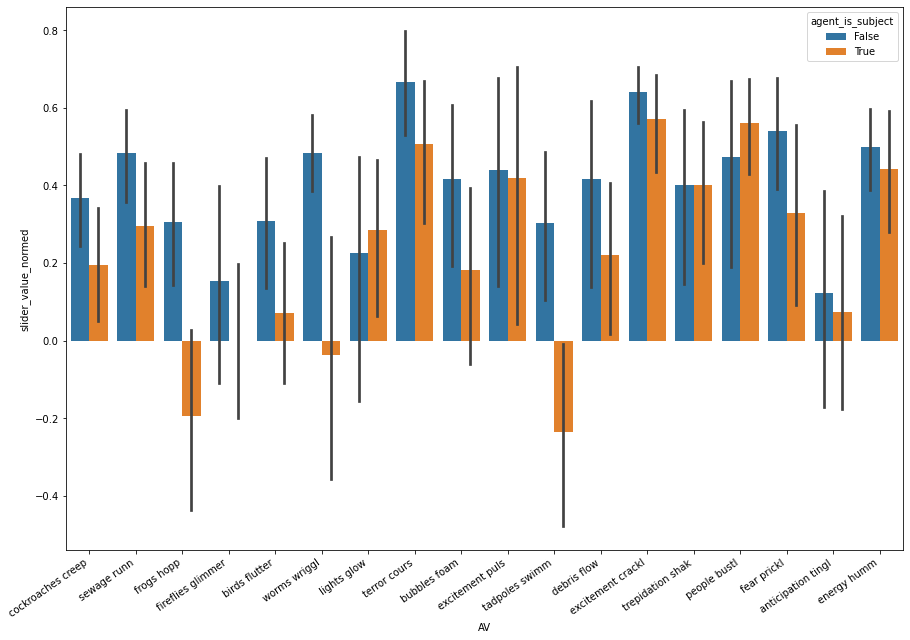

In [92]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

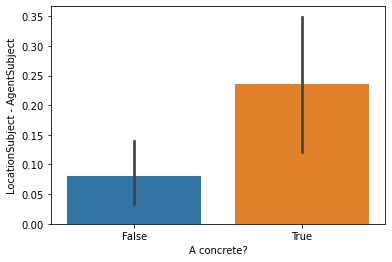

In [93]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

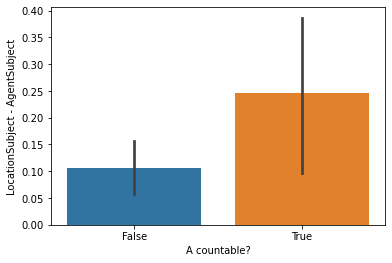

In [94]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

#### Bootstrap check

In [95]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.025, 0.975])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

# item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
# item_bootstrap_df

In [96]:
# item_bootstrap_df = \
#     pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
#              left_index=True, right_index=True).sort_values("low", ascending=False)

In [97]:
# item_bootstrap_df.sort_values("low", ascending=False)

In [98]:
# plt.subplots(figsize=(15, 15))
# sns.barplot(
#     data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
#     x="AV", y="value", hue="variable")
# plt.xticks(rotation=35, ha="right")

### Copouts

In [99]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [100]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_given", "agent_is_subject"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "agent_is_given", "agent_is_subject"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout                            sum  count      mean
item_id agent_is_given agent_is_subject                      
8.0     False          False               1      6  0.166667
30.0    False          True                1      6  0.166667
22.0    False          True                1      8  0.125000
20.0    True           True                1     10  0.100000
25.0    True           False               1     11  0.090909
...                                      ...    ...       ...
20.0    True           False               0     10  0.000000
22.0    False          False               0      7  0.000000
        True           False               0      6  0.000000
                       True                0     11  0.000000
64.0    True           True                0      9  0.000000

[72 rows x 3 columns]

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

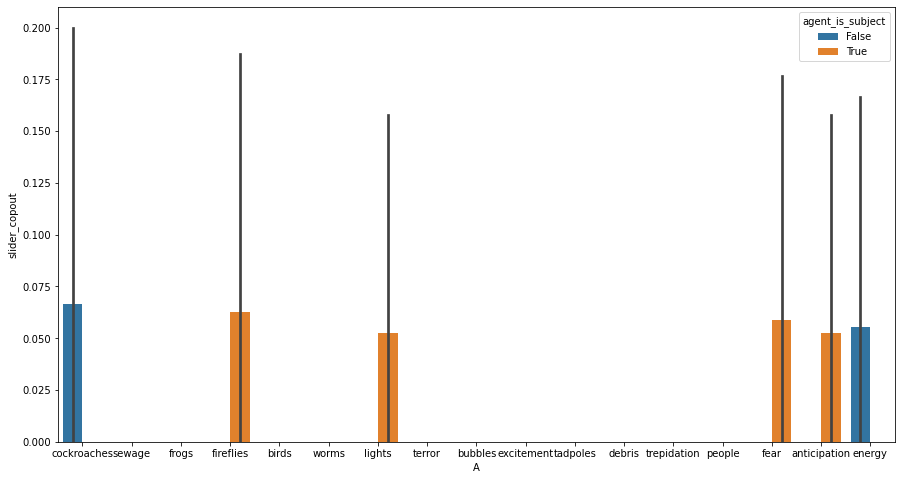

In [101]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

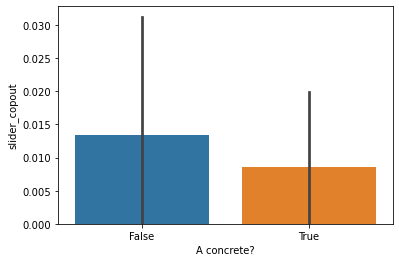

In [102]:
sns.barplot(data=merged_df, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

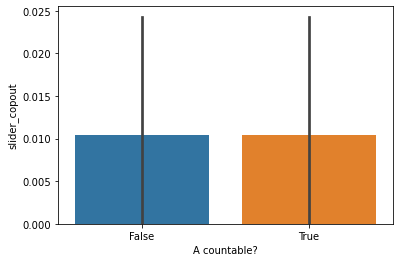

In [103]:
sns.barplot(data=merged_df, x="A countable?", y="slider_copout")

## Item exposure

In [104]:
merged_df.groupby(["item_id", "A", "agent_is_given", "agent_is_subject"]).size().sort_values().head(20)

item_id  A             agent_is_given  agent_is_subject
17.0     debris        False           False               2
18.0     birds         True            False               3
58.0     anticipation  True            False               4
                                       True                4
64.0     worms         True            False               5
31.0     excitement    True            True                5
41.0     trepidation   False           False               5
56.0     tadpoles      False           True                5
30.0     fear          False           True                6
22.0     lights        True            False               6
8.0      cockroaches   False           False               6
31.0     excitement    True            False               6
20.0     fireflies     False           True                6
8.0      cockroaches   True            True                6
20.0     fireflies     False           False               6
25.0     energy        False 

## Basic visualization: givenness manipulation

In [105]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "AV", "A concrete?", "A countable?", "agent_is_given"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

In [106]:
item_differences.sort_values()

item_id  A             V        L           AV                  A concrete?  A countable?  agent_is_given
17.0     debris        flow     river       debris flow         True         False         False            -0.602596
41.0     trepidation   shak     chest       trepidation shak    False        False         False            -0.343017
22.0     lights        glow     sky         lights glow         True         True          True             -0.191011
30.0     fear          prickl   fingertips  fear prickl         False        False         False            -0.121653
4.0      people        bustl    square      people bustl        True         True          False            -0.114729
31.0     excitement    puls     temples     excitement puls     False        False         True             -0.087902
25.0     energy        humm     market      energy humm         False        False         False            -0.039733
7.0      excitement    crackl   theater     excitement crackl   Fals

<AxesSubplot:xlabel='agent_is_given', ylabel='LocationSubject - AgentSubject'>

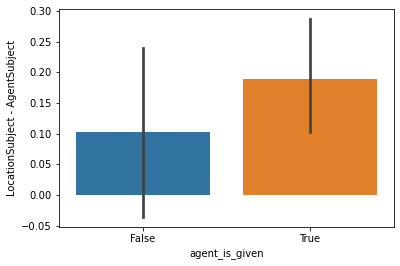

In [107]:
sns.barplot(data=item_differences.reset_index(), x="agent_is_given", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

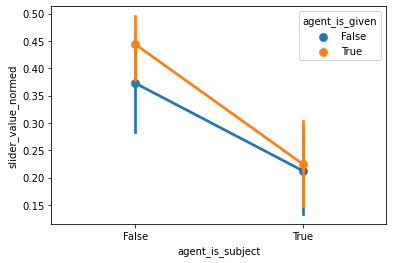

In [108]:
sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

In [109]:
ttest_ind(merged_df[merged_df.agent_is_given & ~merged_df.agent_is_subject & ~merged_df.slider_copout].slider_value_normed,
          merged_df[~merged_df.agent_is_given & ~merged_df.agent_is_subject & ~merged_df.slider_copout].slider_value_normed)

Ttest_indResult(statistic=1.3625699533993598, pvalue=0.17412886413507944)

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

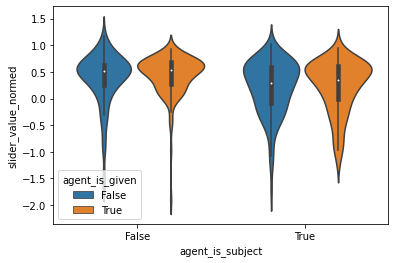

In [110]:
sns.violinplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

### Split by concreteness

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

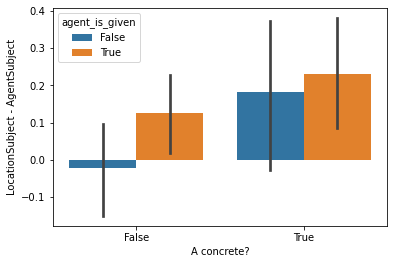

In [111]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject", hue="agent_is_given")

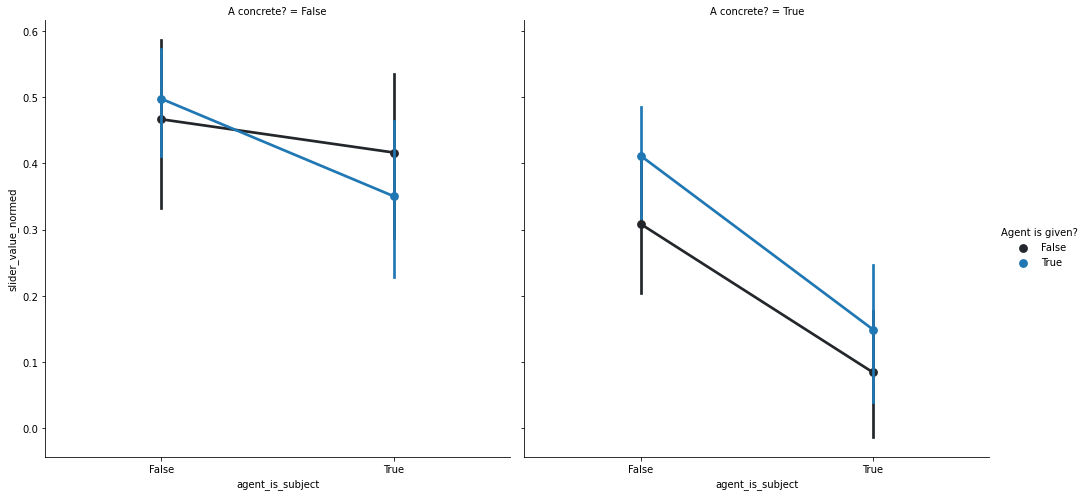

In [112]:
g = sns.FacetGrid(data=merged_df.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

In [113]:
merged_df.groupby("A concrete?").apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed))

A concrete?
False    (0.38845071918122964, 0.6984543474630185)
True      (1.5128487571701008, 0.1322082260879633)
dtype: object

In [114]:
merged_df.groupby(["A concrete?", "agent_is_subject"]).apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.slider_copout].slider_value_normed))

A concrete?  agent_is_subject
False        False               (0.38845071918122964, 0.6984543474630185)
             True                (-0.7311350033396442, 0.4662512758016295)
True         False                (1.5128487571701008, 0.1322082260879633)
             True                 (0.9046777371559412, 0.3668589604173631)
dtype: object

### Split by item

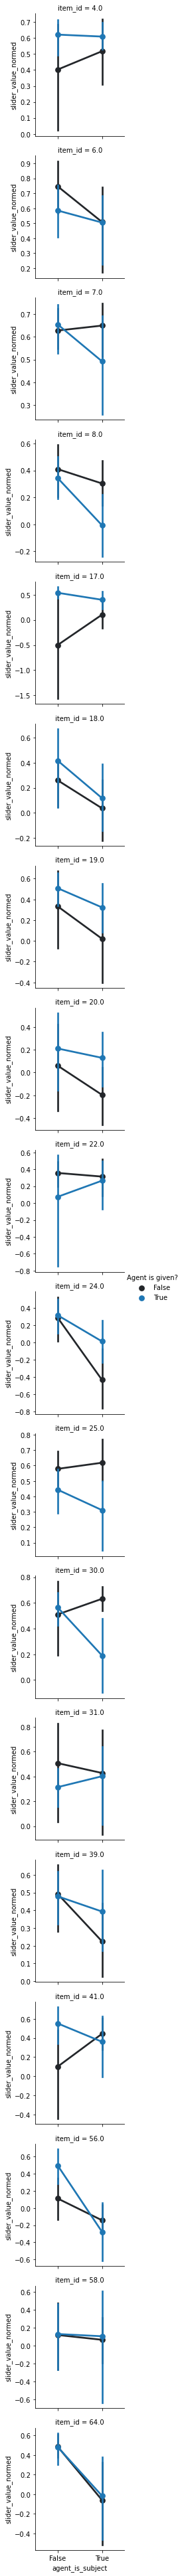

In [115]:
g = sns.FacetGrid(data=merged_df.reset_index(), row="item_id", sharey=False)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True])
g.add_legend(title="Agent is given?")
# sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

## Extras

In [116]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

KeyError: 'A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX'

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])